In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df_drug=pd.read_csv("E:\drug200.csv")
df_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [2]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [3]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
print("Sex:")
print(df_drug.Sex.value_counts())
print("\nBP: ")
print(df_drug.BP.value_counts())
print("\nCholesterol: ")
print(df_drug.Cholesterol.value_counts())
print("\nDrug: ")
print(df_drug.Drug.value_counts())

Sex:
M    104
F     96
Name: Sex, dtype: int64

BP: 
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

Cholesterol: 
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

Drug: 
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


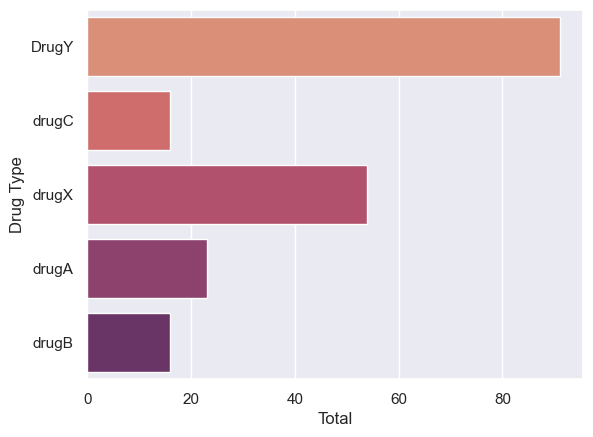

In [5]:
#Drug distribution
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [6]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age'], axis = 1)
df_drug

,Sex,BP,Cholesterol,Na_to_K,Drug,Age_binned
0,F,HIGH,HIGH,25.355,DrugY,20s
1,M,LOW,HIGH,13.093,drugC,40s
2,M,LOW,HIGH,10.114,drugC,40s
3,F,NORMAL,HIGH,7.798,drugX,20s
4,F,LOW,HIGH,18.043,DrugY,60s
...,...,...,...,...,...,...
195,F,LOW,HIGH,11.567,drugC,50s
196,M,LOW,HIGH,12.006,drugC,<20s
197,M,NORMAL,HIGH,9.894,drugX,50s
198,M,NORMAL,NORMAL,14.020,drugX,20s


In [7]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'], axis = 1)
df_drug

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,DrugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,DrugY,60s,10-20
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,50s,10-20
196,M,LOW,HIGH,drugC,<20s,10-20
197,M,NORMAL,HIGH,drugX,50s,10-20
198,M,NORMAL,NORMAL,drugX,20s,10-20


In [8]:
from sklearn.model_selection import train_test_split

X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [10]:
X_train

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0
192,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
117,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
47,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [11]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
X_train

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
301,1,0,0,1,0,0,1,0,0,0,0,0,162,0,162,0,0,0
302,0,1,0,0,1,1,0,0,0,0,0,1,0,0,137,0,0,0
303,0,83,0,0,1,1,0,0,0,0,0,0,83,0,1,0,0,0


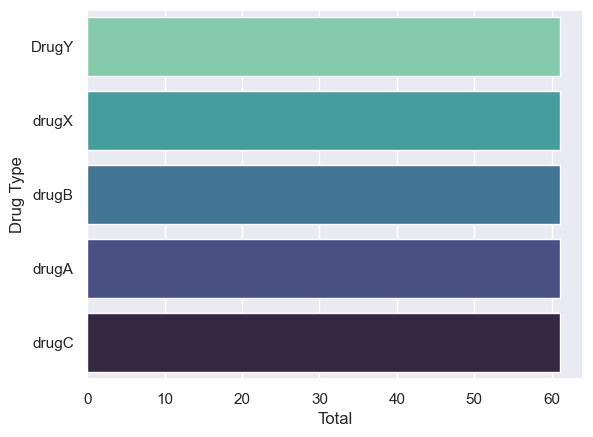

In [12]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [14]:
best_k = None
best_accuracy = 0.0
k_values = list(range(1, 139))  

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
knnClassifier = KNeighborsClassifier(n_neighbors=best_k)
knnClassifier.fit(X_train, y_train)
knnAccuracy=best_accuracy
y_pred = knnClassifier.predict(X_test)

print("KNN Accuracy:", knnAccuracy * 100,"\n")
print("Best K value:", best_k)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

KNN Accuracy: 76.66666666666667 

Best K value: 19
Classification Report:
              precision    recall  f1-score   support

       DrugY       0.87      0.67      0.75        30
       drugA       0.62      1.00      0.77         5
       drugB       0.50      0.33      0.40         3
       drugC       0.50      0.50      0.50         4
       drugX       0.78      1.00      0.88        18

    accuracy                           0.77        60
   macro avg       0.66      0.70      0.66        60
weighted avg       0.78      0.77      0.76        60

Confusion Matrix:
[[20  2  1  2  5]
 [ 0  5  0  0  0]
 [ 1  1  1  0  0]
 [ 2  0  0  2  0]
 [ 0  0  0  0 18]]


In [15]:
best_max_leaf_nodes = None
best_accuracy = 0.0
max_leaf_nodes_values = list(range(2, 50))  
for max_leaf_nodes in max_leaf_nodes_values:
    dtClassifier = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    dtClassifier.fit(X_train, y_train)
    y_pred = dtClassifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_leaf_nodes = max_leaf_nodes
best_dtClassifier = DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes)
best_dtClassifier.fit(X_train, y_train)

y_pred = best_dtClassifier.predict(X_test)
dtAccuracy=best_accuracy

print("Decision Tree Accuracy:",dtAccuracy * 100,"\n")
print("Best max_leaf_nodes:", best_max_leaf_nodes)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 81.66666666666667 

Best max_leaf_nodes: 21
Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      0.63      0.78        30
       drugA       0.56      1.00      0.71         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.82        60
   macro avg       0.76      0.93      0.81        60
weighted avg       0.87      0.82      0.81        60

Confusion Matrix:
[[19  4  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]


In [16]:
nbClassifier = CategoricalNB()
nbClassifier.fit(X_train, y_train)

y_pred = nbClassifier.predict(X_test)

nbAccuracy = accuracy_score(y_pred,y_test)
print("Naive Bayes Accuracy:", nbAccuracy * 100,"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Naive Bayes Accuracy: 83.33333333333334 

Classification Report:
              precision    recall  f1-score   support

       DrugY       0.95      0.70      0.81        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.81      0.94      0.87        18

    accuracy                           0.83        60
   macro avg       0.78      0.93      0.83        60
weighted avg       0.86      0.83      0.83        60

Confusion Matrix:
[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]


In [17]:
svcClassifier = SVC(kernel='linear', max_iter=100000)
svcClassifier.fit(X_train, y_train)

y_pred = svcClassifier.predict(X_test)

svcAccuracy = accuracy_score(y_pred,y_test)
print("SVM Accuracy:", svcAccuracy * 100,"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SVM Accuracy: 85.0 

Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

Confusion Matrix:
[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]


C:\Users\Varuna\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [18]:
compare = pd.DataFrame({'Model': ['K Neighbors', 'Decision Tree', 'Naive Bayes', 'SVM'], 
                        'Accuracy': [knnAccuracy*100, dtAccuracy*100, nbAccuracy*100, svcAccuracy*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,SVM,85.000000
2,Naive Bayes,83.333333
1,Decision Tree,81.666667
0,K Neighbors,76.666667


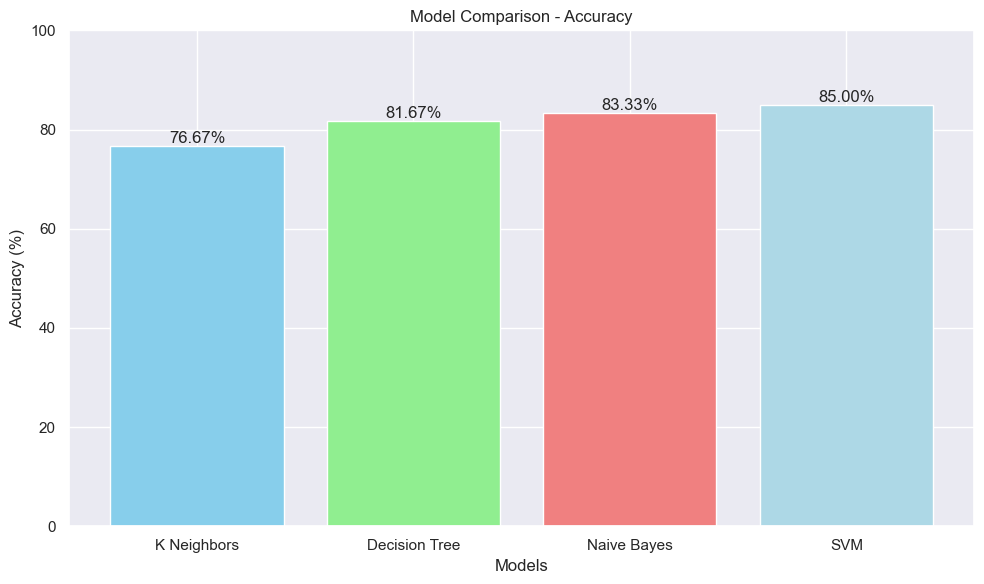

In [19]:
import matplotlib.pyplot as plt
models = compare['Model']
accuracy = compare['Accuracy']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['skyblue', 'lightgreen', 'lightcoral', 'lightblue'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 100)

for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [20]:
def recommend_drug(user_input):
    user_data = pd.DataFrame(columns=X_train.columns, data=[user_input])
    user_data.fillna(0, inplace=True)
    predicted_drug = nbClassifier.predict(user_data)
    return predicted_drug[0]

age = int(input("Enter your age: "))
sex = input("Enter your gender (M/F): ")
bp = input("Enter your blood pressure level (HIGH/LOW/NORMAL): ")
cholesterol = input("Enter your cholesterol level (HIGH/NORMAL): ")
na_to_k = float(input("Enter your sodium to potassium ratio: "))

user_input = {
    'Age': age,
    'Sex': sex,
    'BP': bp,
    'Cholesterol': cholesterol,
    'Na_to_K': na_to_k
}


recommended_drug = recommend_drug(user_input)
print("Recommended Drug:", recommended_drug)

Enter your age: 21
Enter your gender (M/F): F
Enter your blood pressure level (HIGH/LOW/NORMAL): LOW
Enter your cholesterol level (HIGH/NORMAL): NORMAL
Enter your sodium to potassium ratio: 7.8
Recommended Drug: DrugY


In [21]:
def recommend_drug(user_input, classifier):
    user_data = pd.DataFrame(columns=X_train.columns, data=[user_input])
    user_data.fillna(0, inplace=True)
    predicted_drug = classifier.predict(user_data)
    return predicted_drug[0]
age=int(input("Enter your age: "))
sex=input("Enter your gender (M/F): ")
bp=input("Enter your blood pressure level (HIGH/LOW/NORMAL): ")
cholesterol=input("Enter your cholesterol level (HIGH/NORMAL): ")
na_to_k=float(input("Enter your sodium to potassium ratio: "))

user_input = {
    'Age': age,
    'Sex': sex,
    'BP': bp,
    'Cholesterol': cholesterol,
    'Na_to_K': na_to_k
}

print("Select a Machine Learning Algorithm:\n1. K Neighbors\n2. Decision Tree\n3. Support Vector Machine (SVM)\n4. Naive Bayes\n5. Stop")
while True:
    choice=int(input("Enter Algorithm: "))
    if choice==5:
        print("Thank You")
        break
    elif choice==1:
        classifier=knnClassifier
        name="KNN"
    elif choice==2:
        classifier=best_dtClassifier
        name="Decision Tree"
    elif choice==3:
        classifier=svcClassifier
        name="SVM"
    else:
        classifier=nbClassifier
        name="Naive Bayes"

    recommended_drug=recommend_drug(user_input, classifier)
    print("Recommended Drug using",name," ", recommended_drug)


Enter your age: 21
Enter your gender (M/F): F
Enter your blood pressure level (HIGH/LOW/NORMAL): HIGH
Enter your cholesterol level (HIGH/NORMAL): HIGH
Enter your sodium to potassium ratio: 20.5
Select a Machine Learning Algorithm:
1. K Neighbors
2. Decision Tree
3. Support Vector Machine (SVM)
4. Naive Bayes
5. Stop
Enter Algorithm: 1
Recommended Drug using KNN   drugX
Enter Algorithm: 2
Recommended Drug using Decision Tree   drugX
Enter Algorithm: 3
Recommended Drug using SVM   DrugY
Enter Algorithm: 4
Recommended Drug using Naive Bayes   DrugY
Enter Algorithm: 5
Thank You


In [63]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

def recommend_drug():
    age = age_var.get()
    sex = sex_var.get()
    bp = bp_var.get()
    cholesterol = cholesterol_var.get()
    na_to_k = na_to_k_var.get()
    user_input = {
        'Age': age,
        'Sex': sex,
        'BP': bp,
        'Cholesterol': cholesterol,
        'Na_to_K': na_to_k
    }
    user_data = pd.DataFrame(columns=X_train.columns, data=[user_input])
    user_data.fillna(0, inplace=True)
    predicted = nbClassifier.predict(user_data)
    recommended_drug_label.config(text=f"Recommended Drug: {predicted[0]}")
window = tk.Tk()
window.title("Drug Recommendation System")
age_label = tk.Label(window, text="Age:")
age_label.grid(row=0, column=0)
age_var = tk.StringVar()
age_entry = tk.Entry(window, textvariable=age_var)
age_entry.grid(row=0, column=1)

sex_label = tk.Label(window, text="Gender (M/F):")
sex_label.grid(row=1, column=0)
sex_var = tk.StringVar()
sex_entry = tk.Entry(window, textvariable=sex_var)
sex_entry.grid(row=1, column=1)

bp_label = tk.Label(window, text="Blood Pressure (HIGH/LOW/NORMAL):")
bp_label.grid(row=2, column=0)
bp_var = tk.StringVar()
bp_entry = tk.Entry(window, textvariable=bp_var)
bp_entry.grid(row=2, column=1)

cholesterol_label = tk.Label(window, text="Cholesterol (HIGH/NORMAL):")
cholesterol_label.grid(row=3, column=0)
cholesterol_var = tk.StringVar()
cholesterol_entry = tk.Entry(window, textvariable=cholesterol_var)
cholesterol_entry.grid(row=3, column=1)

na_to_k_label = tk.Label(window, text="Sodium to Potassium Ratio:")
na_to_k_label.grid(row=4, column=0)
na_to_k_var = tk.DoubleVar()
na_to_k_entry = tk.Entry(window, textvariable=na_to_k_var)
na_to_k_entry.grid(row=4, column=1)

recommend_button = tk.Button(window, text="Recommend Drug", command=recommend_drug)
recommend_button.grid(row=5, column=0, columnspan=2)

recommended_drug_label = tk.Label(window, text="")
recommended_drug_label.grid(row=6, column=0, columnspan=2)

window.mainloop()
